# Задан лаплассиан в цилиндрической системе координат

In [2]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [79]:
class Solver:
    def __init__(self, Nr=10):
        self.r0 = 1
        self.r1 = 2
        self.z0 = 0
        self.z1 = 1
        self.Nr = Nr
        self.hr = (self.r1 - self.r0)/(self.Nr)
        self.hz = self.hr
        self.Nz = int((self.z1 - self.z0)/(self.hz))
        self.matrix = np.zeros([self.Nr*self.Nz, self.Nr*self.Nz])
        self.f = np.zeros(self.Nr*self.Nz)
        self.res = np.zeros([self.Nz, self.Nr])
    def count_i(self, n, k):
        return n+(k-1)*self.Nz
    def fill_cell(self, a, n, k, value):
        self.matrix[a][self.count_i(n, k)]  = value
    def fill_matrix(self):
        for n in range(self.Nr):
            for k in range(self.Nz):
                a = self.count_i(n, k)
                r = self.r0+n*self.hr
                z = self.z0+k*self.hz
                if (r == self.r0):
                    self.matrix[a][self.count_i(n, k)] = 1
                elif (r == self.r1):
                    self.matrix[a][self.count_i(n, k)] = 1
                elif (z==self.z0):
                    self.matrix[a][self.count_i(n, k)] = 1
                elif (z==self.z1):
                    self.matrix[a][self.count_i(n, k)] = 1
                else: 
                    self.fill_cell(a, n+1, k, 1/(r*2*self.hr))
                    self.fill_cell(a, n, k, -2*(1/self.hr**2 + 1/self.hz**2))
                    self.fill_cell(a, n - 1, k, 1/(2*r*self.hr) + 1/self.hr**2)
                    self.fill_cell(a, n, k + 1,  -1/(2*r*self.hr)+1/(self.hz**2))
                    self.fill_cell(a, n, k - 1 , 1/self.hz**2)
    def fill_f(self):
        for n in range(self.Nr):
            for k in range(self.Nz):
                r = self.r0+n*self.hr
                z = self.z0+k*self.hz
                if n == 0:
                    self.f[self.count_i(n, k)] = 0
                elif k == 0:
                    self.f[self.count_i(n, k)] = 0
                elif n == self.Nr - 1:
                    self.f[self.count_i(n, k)] = z
                elif k == self.Nz - 1:
                    self.f[self.count_i(n, k)] = r - 1
                else:
                    self.f[self.count_i(n, k)] = 0
                    
    def solve(self):
        self.fill_matrix()
        self.fill_f()
        self.u = np.linalg.solve(self.matrix, self.f)
        for n in range(self.Nr):
            for k in range(self.Nz):
                i = self.count_i(n, k)
                self.res[n][k] = self.u[i]
        fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
        X = np.arange(self.r0, self.r1, self.hr)
        Y = np.arange(self.z0, self.z1, self.hz)
        X,Y = np.meshgrid(X, Y)
        surf = ax.plot_surface(X, Y, self.res, cmap=cm.coolwarm, linewidth=0, antialiased=False )
        plt.show()
                

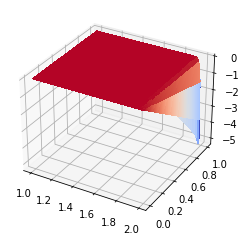

In [80]:
s = Solver(100)
s.solve()